# Image Classification from Scratch with Numpy

## Details

* Layers = multiple Fully Connected Layers
* [Activation Function](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6) = Sigmoid
* [Loss Function](https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8) = Cross Entropy

## References

### Using Cross-Entropy Loss Function for Classification
* [Simple Cat Image Classification](https://towardsdatascience.com/step-by-step-guide-to-building-your-own-neural-network-from-scratch-df64b1c5ab6e)

* [MNIST Image Classification with good matrix math explanation](https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65)


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

## Our Activation Function, the Sigmoid

In [58]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

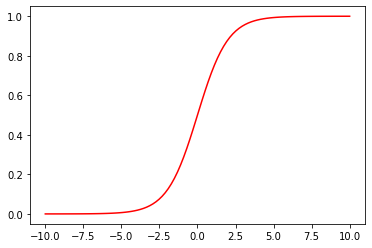

In [59]:
input = np.linspace(-10, 10, 100)

plt.plot(input, sigmoid(input), c="r")

## Derivative of Activation Function

In [60]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

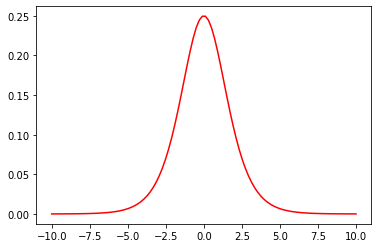

In [61]:
input = np.linspace(-10, 10, 100)

plt.plot(input, sigmoid_derivative(input), c="r")

## Load Image Data

### Use image loading util and image data from Coursera

* https://github.com/andersy005/deep-learning-specialization-coursera/tree/master/01-Neural-Networks-and-Deep-Learning/week2/Programming-Assignments

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('./'))

from lr_utils import load_dataset

In [3]:
train_set_x_orig,  train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

### Look at the Image

In [54]:
(train_set_x_orig.shape, train_set_y.shape, test_set_x_orig.shape, test_set_y.shape)

((209, 64, 64, 3), (1, 209), (50, 64, 64, 3), (1, 50))

non-cat


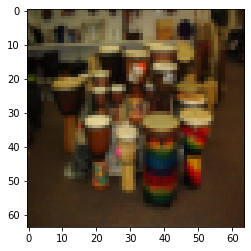

In [41]:
idx = 5

plt.imshow(train_set_x_orig[idx])
print(classes[np.squeeze(train_set_y[:,idx])].decode('utf-8'))

In [52]:

print ("Number of training examples: m_train = ", train_set_y.shape[1])
print ("Number of testing examples: m_test = ", test_set_y.shape[1])
print ("Each image is of size: ", train_set_x_orig.shape[1:4])

Number of training examples: m_train =  209
Number of testing examples: m_test =  50
Each image is of size:  (64, 64, 3)


## Flatten images into 2D matrix, and normalize

In [90]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
train_set_x_flatten.shape

(209, 12288)

In [91]:
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
test_set_x_flatten.shape

(50, 12288)

In [92]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

## Define input and expected output (labels)

In [93]:
# independent variables

feature_set = train_set_x

feature_set.shape

(209, 12288)

In [94]:
# dependent variables

labels = train_set_y

# convert labels to vector
labels = labels.reshape(labels.shape[1],1)

labels.shape

(209, 1)

## Initialize hyperparameters

In [68]:
np.random.seed(42)

In [106]:
# define weights

weights = np.random.rand(feature_set.shape[1],1)

weights.shape

(12288, 1)

In [107]:
# bias

bias = np.random.rand(1)

bias.shape

(1,)

In [108]:
# learning rate
lr = 0.05

## step through gradient descent loop once

### forward pass

In [109]:
feature_set.shape

(209, 12288)

In [110]:
weights.shape

(12288, 1)

In [111]:
bias

array([0.90850255])

In [112]:
XW = np.dot(feature_set, weights) + bias

XW

array([[1647.87311553],
       [2697.91490971],
       [3212.06333462],
       [1367.71161339],
       [1524.0871172 ],
       [1374.27038128],
       [1528.25854928],
       [1837.9089379 ],
       [2318.74361469],
       [1994.29947162],
       [3165.50047825],
       [2592.66656145],
       [1985.95988218],
       [3355.37185942],
       [2935.25709824],
       [3575.09262036],
       [3123.60170063],
       [3784.22457795],
       [2886.91189963],
       [1366.08022879],
       [2698.28351809],
       [1628.01821025],
       [4009.97272471],
       [3695.3618446 ],
       [3069.40793387],
       [ 980.17429387],
       [2344.64439481],
       [2633.70163952],
       [1812.50094459],
       [2195.33961353],
       [1198.06208521],
       [3128.30828125],
       [2572.2520887 ],
       [2961.61676862],
       [1817.22360821],
       [1822.25519339],
       [2242.22238167],
       [3823.36051645],
       [ 514.95560302],
       [2330.40315823],
       [2235.6060526 ],
       [ 960.410

In [113]:
XW.shape

(209, 1)

In [114]:
z = sigmoid(XW)

z.shape

(209, 1)

In [116]:
labels.shape

(209, 1)

In [117]:
error = z - labels

(error, error.sum())

(array([[1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
      

### back-propagation

### Calculate Slope of Cost Function

* For single layer net, using chain rule, d_cost/d_weight = d_cost/d_pred * d_pred/d_z * d_z/d_w
* for MSE, d_cost/d_pred = 2(predicted - observed), which is just the error 
* for Sigmoid, d_pred/d_z is Sigmoid*(1-Sigmoid)
* for single layer, z = x1w1+x2w2+x3w3+b, so d_z/d_w = x (input)



In [118]:
d_cost_d_pred = error

d_cost_d_pred.shape

(209, 1)

In [119]:
d_pred_d_z = sigmoid_derivative(z)

d_pred_d_z.shape

(209, 1)

In [120]:
d_cost_d_z = d_cost_d_pred * d_pred_d_z

d_cost_d_z.shape

(209, 1)

In [121]:
d_z_d_w = feature_set.T

d_z_d_w.shape

(12288, 209)

In [122]:
d_cost_d_weight = np.dot(d_z_d_w, d_cost_d_z)

d_cost_d_weight

array([[ 9.82828358],
       [10.66639014],
       [ 9.11816754],
       ...,
       [ 8.93774718],
       [ 9.62396138],
       [ 6.95466525]])

In [123]:
lr * d_cost_d_weight

array([[0.49141418],
       [0.53331951],
       [0.45590838],
       ...,
       [0.44688736],
       [0.48119807],
       [0.34773326]])

In [124]:
new_weights = weights - lr * d_cost_d_weight

(weights, new_weights)

(array([[0.7649515 ],
        [0.58573052],
        [0.13024457],
        ...,
        [0.88006582],
        [0.39844478],
        [0.18619634]]),
 array([[ 0.27353732],
        [ 0.05241101],
        [-0.3256638 ],
        ...,
        [ 0.43317846],
        [-0.08275329],
        [-0.16153692]]))

In [125]:
weights = new_weights

In [126]:
d_cost_d_z

array([[0.19661193],
       [0.19661193],
       [0.        ],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.        ],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.        ],
       [0.19661193],
       [0.        ],
       [0.        ],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.        ],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.        ],
       [0.        ],
       [0.19661193],
       [0.        ],
       [0.19661193],
       [0.        ],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.        ],
       [0.19661193],
       [0.19661193],
       [0.        ],
       [0.        ],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.19661193],
       [0.   

In [127]:
new_bias = bias

for num in d_cost_d_z:
    new_bias = new_bias - lr*num
    
(bias,new_bias)

(array([0.90850255]), array([-0.43828919]))

In [128]:
bias = new_bias

## Training Loop

### Initialize hyperparameters

In [129]:
np.random.seed(42)

In [130]:
# define weights

weights = np.random.rand(feature_set.shape[1],1)

weights

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       ...,
       [0.76511151],
       [0.76401263],
       [0.29244546]])

In [131]:
# bias

bias = np.random.rand(1)

bias

array([0.08139032])

In [132]:
# learning rate
lr = 0.05

In [133]:

for epoch in range(10):
    # forward pass
    
    inputs = feature_set
    XW = np.dot(inputs, weights) + bias
    
    z = sigmoid(XW)
    error = z - labels
    print( "Epoch ", epoch, " Error: ", error.sum() )
    
    # backward pass
    
    # find slope of cost function using chain rule
    d_cost_d_pred = error
    d_pred_d_z = sigmoid_derivative(z)
    d_z_d_w = feature_set.T
 
    # do actual calc of cost function slope
    d_cost_d_z = d_cost_d_pred * d_pred_d_z
    d_cost_d_weight = np.dot(d_z_d_w, d_cost_d_z)
    
    # adjust weights via learning rate (lr)
    # NB: always SUBTRACT the adjustment since we want to DECREASE Cost Function
    weights = weights - lr * d_cost_d_weight
    
    for num in d_cost_d_z:
        bias = bias - lr*num


Epoch  0  Error:  137.0
Epoch  1  Error:  -71.00000000015929
Epoch  2  Error:  137.0
Epoch  3  Error:  -72.0
Epoch  4  Error:  137.0
Epoch  5  Error:  -72.0
Epoch  6  Error:  -2.683324927784738
Epoch  7  Error:  112.35115389707073
Epoch  8  Error:  -72.0
Epoch  9  Error:  -71.9415236126786


/home/mhuang/miniconda3/envs/jupyter_py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


## Predictions

In [ ]:
def predict(x):
    input = np.array(x)
    result = sigmoid(np.dot(input, weights) + bias)
    print(result)
    

In [ ]:
predict([1,0,0])

In [ ]:
predict([0,1,0])